### Short introduction to Gradient descent.

<br />
In this coding example we explain how gradient descent would work for a single layer preceptron with linear output.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

### Video Links
<br />
https://www.youtube.com/watch?v=sDv4f4s2SB8
<br />
https://www.youtube.com/watch?v=DjF3GiCazwc&list=LLkGG_GT2lhbfvl5e9bZpJ8g&index=2&t=0s

### Case 1, Using the aglortihm to solve for a single parameter.
<br />
For a line fitting task, we are provided with one of the parameters "w" which is used scale the line being fit. Using the optimization technique of gradient descent we will find the bias term needed to fit the curve.

### Given the data, X & Y

In [8]:
X = np.array([0.5,2.3,2.9])
Y = np.array([1.4,1.9,3.2])

### Using pre-calculated slope w = 0.64

The fot line with bias term set at 0, which results in model with high Sum of squared error.

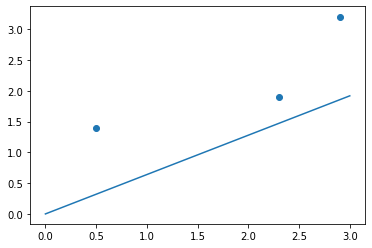

In [9]:
plt.scatter(X,Y)
W = 0.64
plt.plot(range(math.ceil(np.max(X))+1),[W*i for i in range(math.ceil(np.max(X))+1)])
plt.show()

We will use gradient descent to find the parameter $\alpha$ for the optimum value that minimizes SSE our cost function

In [10]:
#Cost Function
def ss_loss(X,Y,B):
    return np.sum(((Y - (W*X + B)))**2)

Example, if we change our bias term $alpha$ to 0.8, our Sum of squared error is reduced accordingly.

In [11]:
ss_loss(X,Y,0)

3.1559200000000005

Looking at the curve for SSE vs different alphas, it can be seen that the optimum value of $\alpha$ should be around 1, which minimizes SSE.

(-1, 10)

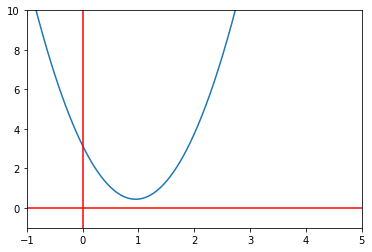

In [59]:
plt.plot([p/1000 for p in range(-10000,10000)],[ss_loss(X,Y,i) for i in [p/1000 for p in range(-10000,10000)]])
plt.axvline(x = 0, c = 'r')
plt.axhline(y = 0, c = 'r')
plt.xlim([-1,5])
plt.ylim([-1,10])

$$ loss = (Y - \hat{Y})^ 2 $$
<br />
$$w = 0.64$$
<br />
$$\hat{y} = \alpha + xw$$
<br />
$$SSE = \sum (y_i - (\alpha + wx_i))^2$$
<br />
$$ SSE = (1.4 - (\alpha + 0.32))^2 + (1.9 - (\alpha + 1.4))^2 + (3.2 - (\alpha + 1.8))^2 $$
<br />
$$SSE = f(x_1) + f(x_2) + f(x_3) $$
<br />
<br />
The derivative of SSE will give us an indicator of minimum, as when d/d $\alpha$ SSE =0; will give us optimum alpha value
<br />
The motivation behind this is: not all cost functions are as easy to solve as the ones above
<br />
<br />
$$ d \ / \ d\alpha \ SSE = f'(x_1) + f'(x_2) + f'(x_3) $$
<br />
$$-2(-\alpha + 1.08) - 2(-\alpha + 0.42) - 2(-\alpha  + 1.3)$$
<br />
$$d \ / \ d\alpha \ SSE = 6\alpha - 5.7$$
<br />
$$slope(\alpha) = d \ / \ d\alpha \ SSE = 6\alpha - 5.7$$

### High level overview of gradient descent.
<br />
Given a random starting point in our cost curve (SEE), we use the derivative along with a learning rate C to understand which direction to move. An example is shown below.

### Lets initialize gradient descent at  $\alpha  = 0$
<br />
$$Slope(0) = -5.7$$
<br />
$$Step \ Size(\alpha) = Slope(\alpha_t) \times C$$
<br />
$$Let \ C = 0.1$$
<br />
$$Step \ Size(Slope(0)) = -5.7 \times 0.1 = -0.57$$
<br />
$$\alpha_{new} = 0 - Step \ Size(Slope(0)) $$
<br />
$$ \alpha_{new} = 0 + 0.57 = 0.57$$
<br />
$$slope(0.57) = -2.3$$
<br />
$$\text{We move closer to 0}$$
<br />
$$sse(0.57) = 1$$
<br />

### From the previous iteration  $\alpha  = 0.57$
<br />
$$Slope(0.57) = -2.3$$
<br />
$$Step Size(Slope(0)) = -2.3 \times 0.1 = -0.23$$
<br />
$$\alpha_{new} = 0.57 - Step Size(Slope(0.57)) = 0 + 0.23 = 0.8, slope(0.8) = -0.9$$
<br />
$$sse(0.8) = 0.5$$

### We see that in each itteration of gradient descent, the slope moves closer to zero and the sse decreases as well. We continue gradient descent until convergence, or for N itteration.

In [7]:
def gradient_decent(alpha,C = 0.1):
    step_size = (6*alpha - 5.7) * C
    return alpha - step_size,6*(alpha - step_size ) - 5.7

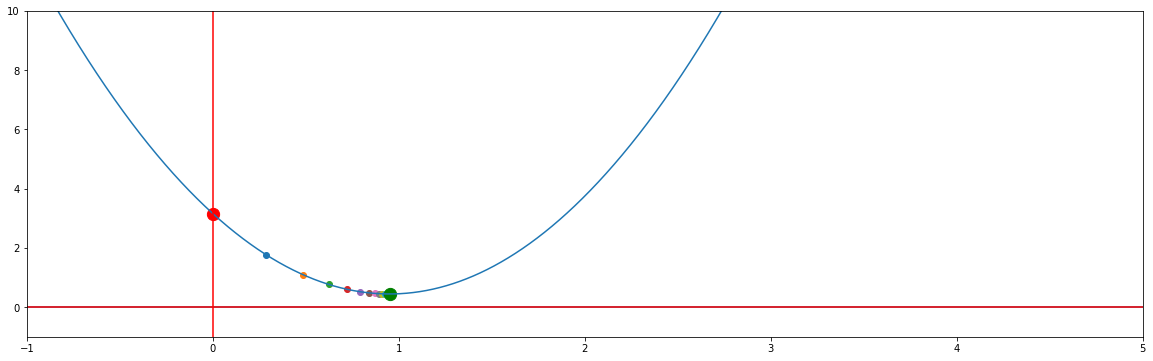

Converged Value  0.9499999288404086


In [8]:
f,ax = plt.subplots(figsize = (20,6))
plt.plot([p/1000 for p in range(-10000,10000)],[ss_loss(X,Y,i) for i in [p/1000 for p in range(-10000,10000)]])

alpha = 0
out = 6*alpha - 5.7
plt.scatter(round(alpha,3), ss_loss(X,Y,alpha), c = 'r', s = 150)
plt.axhline(y=0)
counter = 0
while round(out,6) != 0:
    alpha,out = gradient_decent(alpha,C = 0.05)
    plt.scatter(round(alpha,3), ss_loss(X,Y,alpha))
    counter += 1
    if counter == 1000:
        print ("No Convergence")
        break
    
plt.scatter(round(alpha,3), ss_loss(X,Y,alpha),c = 'g', s = 150)
    
plt.axvline(x = 0, c = 'r')
plt.axhline(y = 0, c = 'r')
plt.xlim([-1,5])
plt.ylim([-1,10])
plt.show()
print ("Converged Value ",alpha)

After initializing at alpha = 0, new alphas move closer and closer to the optimum.

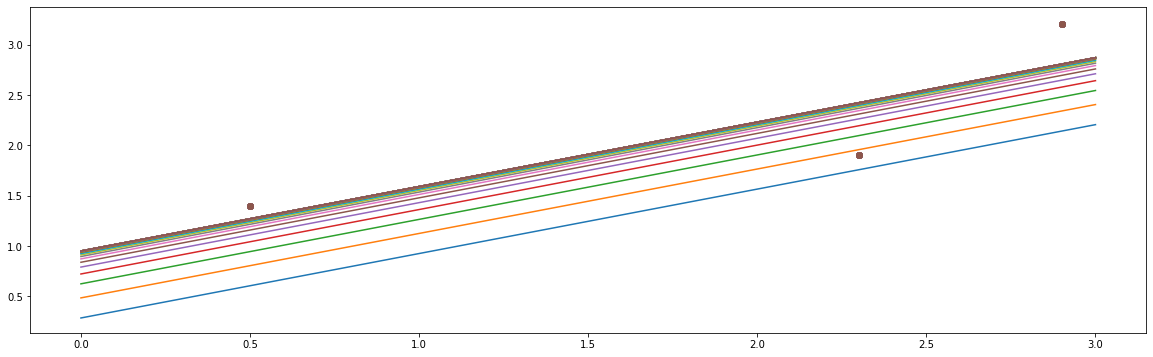

In [9]:
alpha = 0
out = 6*alpha - 5.7 
f,ax = plt.subplots(figsize = (20,6))
counter = 0
while round(out,6) != 0:
    alpha,out = gradient_decent(alpha,C = 0.05)
    plt.scatter(X,Y)
    W = 0.64
    plt.plot(range(4),[W*i + alpha for i in range(4)])
    counter += 1
    if counter == 1000:
        print ("No Convergence")
        break
plt.show()

We can also observe this with the bias, in each itteration our bias fits the curve more and more closer to the observed points.

### Case 2, Gradient Descent to find both parameters
<br />
Lets use gradient descent to find both parameters alpha and w. Refer to the video links above to understand the calculations behind the equation.

In [10]:
theta = np.array([1,0])
xmat = np.vstack([X,np.ones(len(X))])

In [11]:
from scipy.misc import derivative

In [12]:
def sse_f(b1,b0):
    return np.sum(((Y - (np.dot(np.array([b1,b0]),xmat))))**2)

def partial_derivative(func, var=0, point=[]):
    args = point[:]
    def wraps(x):
        args[var] = x
        return func(*args)
    return derivative(wraps, point[var], dx = 1e-6)

def update(lossv,theta):
    theta = list(theta)
    W = []
    for i in range(len(theta)):
        W.append(partial_derivative(lossv,i,theta))
    return np.array(W)

In [13]:
def MVGrad(theta,J,C = 0.05):
    step_size = J * C
    return theta - step_size

In [33]:
#theta = np.array([1,0])
#xmat = np.vstack([X,np.ones(len(X))])

#print (theta)
#for i in range(1000):
#    J = update(sse_f,theta)
#    theta = MVGrad(theta,J,C = 0.01)
#    print (theta)

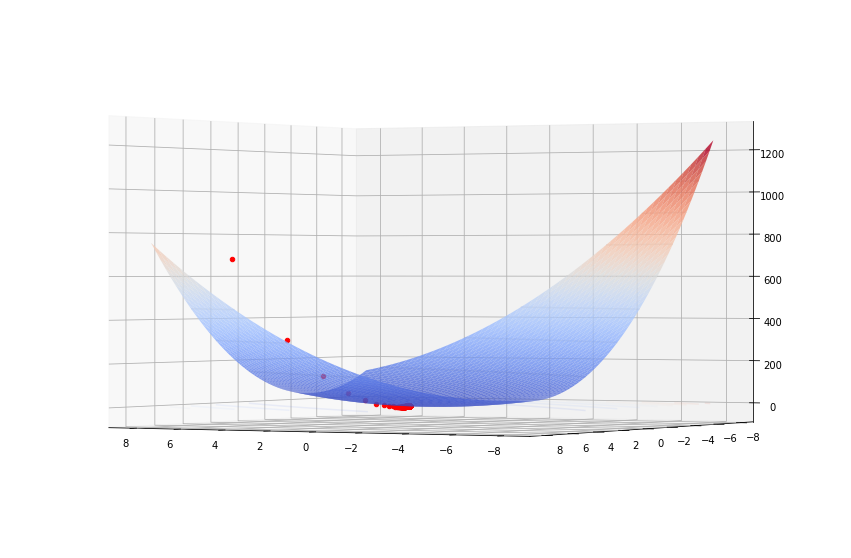

In [52]:
from mpl_toolkits.mplot3d import axes3d

def viz_loss(x1,x2):
    return (1.4 - (x1  + x2*0.32))**2 + (1.9 - (x1  + x2*1.4))**2 + (3.2 - (x1  + x2*1.8))**2 
a1 = np.linspace(-8, 8)
a2 = np.linspace(-8, 8)
A1, A2 = np.meshgrid(a1, a2)
Z = viz_loss(A1, A2)

fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111, projection="3d")


theta = np.array([8,8])
xmat = np.vstack([X,np.ones(len(X))])

for i in range(1000):
    J = update(sse_f,theta)
    theta = MVGrad(theta,J,C = 0.01)
    SumSq = sse_f(theta[0],theta[1])
    ax.scatter(theta[0],theta[1],SumSq, c = 'red')
    

ax.plot_surface(A1, A2, Z, lw=10,cmap="coolwarm", rstride=1, cstride=1, alpha = 0.8)
ax.contour(A1, A2, Z, 10, cmap="coolwarm",linestyles="solid", offset=-1, alpha = 0.1)
ax.contour(A1, A2, Z, 10, colors="k", linestyles="solid", alpha = 0.1)


    
    
ax.view_init(0, 120)    
plt.show()

Above we see that when looking at more than a single factor, the SSE curve we are working with changes into a countour, or surface, similar to a mountaneous terrain. Gradient descent is able to find the minimum of this terratin while using more multiple variables.